# PNGアニメーション

いよいよ前期の授業は最終回になります。

後期の授業は、Pythonを用いて、
オブジェクト指向プログラミングを学びながら、
アルゴリズムとデータ構造の理解を深めていきます。




## モジュールの準備

Python で画像を扱うためには、専用のライブラリ(Python ではモジュールと呼ぶ)を使います。 Google Colaboratory は、あらかじめ多くのモジュールをインストールしてありますが、足りない ものもあるのでそちらは pip を使って追加インストールします。

Pillow(PIL) モジュール: Python で画像を簡単に扱うため
APNG モジュール: アニメーション PNG を作成するため
IPython モジュール: 画像/動画を Google Colaboratory 上に表示するため 

```python
import IPython
```

```python
from PIL import Image , ImageDraw 
!pip install APNG
from apng import APNG
import IPython
```

In [1]:
from PIL import Image , ImageDraw 
from apng import APNG
import IPython

## キャンバス

画像を描画するキャンバス (canvas) を作ってお絵かきを始めます。

__大きさを指定して、キャンバスを作成する__

canvas = Image.new("RGB", (400,300))

キャンバスの大きさは、動画にすることを考えて、あまり大きくせず、400 x 300 くらいにし ておきましょう。

図形を描画する

実際の描画操作は、描画コンテキスト (draw) を作って行います。(この辺りの仕組みは、Python
以外のプログラミング言語でもほぼ同じです。) 

__キャンバスの描画コンテキストを作る__

```python
draw = ImageDraw.Draw(canvas)
```

まずは、長方形 (rectangle) をキャンバス上に描画してみましょう。
fill は、塗りつぶす色を指定し てます。

draw.rectangle((100,100,200,200), fill=’green’)



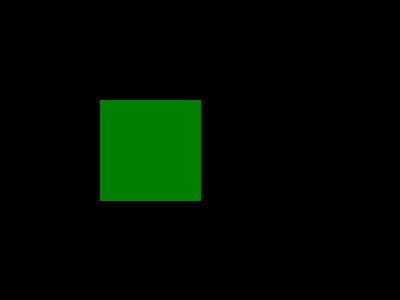

In [4]:
canvas = Image.new("RGB", (400,300))
draw = ImageDraw.Draw(canvas) 
draw.rectangle((100,100,200,200), fill='green')
canvas.save('rect.png') 
IPython.display.Image("rect.png")

<div class="alert alert-info">

Let's try

長方形の色や位置、大きさを変えて表示してみよう

</div>


### 円

円も描画する
ecllipse は、指定した短形におさまる楕円(円)を描画します。

```python
draw.ellipse((250,200, 300, 250),fill=(192, 64, 64))
```

今回は、色を RGB で指定しています。


https://note.nkmk.me/python-pillow-imagedraw/


## アニメーションを作る

アニメーションを作る 動画は、パラパラ漫画と同じ原理で作ります。

つまり、複数の画像ファイルを作成し、APNGモジュールで合成してみます。

まず、ボールが転がるアニメーションを作ってみましょう。
x 軸方向に +20 ずつ移動させながら、3枚ほど画像を作ります。

__ball0.png を作る__
__ball1.png__
__ball2.png を作る__
canvas = Image.new("RGB", (400,300), color=’black’) draw = ImageDraw.Draw(canvas)
draw.ellipse((100, 200, 150, 250),fill=(192, 64, 64)) canvas.save(’ball0.png’)
IPython.display.Image("ball0.png")
canvas = Image.new("RGB", (400,300), color=’black’) draw = ImageDraw.Draw(canvas)
draw.ellipse((100+20, 200, 150+20, 250),fill=(192, 64, 64)) canvas.save(’ball1.png’)
IPython.display.Image("ball1/png")
canvas = Image.new("RGB", (400,300), color=’black’)
draw = ImageDraw.Draw(canvas)
draw.ellipse((100+40, 200, 150+40, 250),fill=(192, 64, 64)) canvas.save(’ball2.png’)
IPython.display.Image("ball2.png")

APNG に変換する
Pillow で保存したファイル名からファイルリストを作ります。
filelist = [’ball0.png’, ’ball1.png’, ’ball2.png’]
APNG モジュールは、画像ファイルのリストからアニメーション PNG を作成します。delay は、
画像 1 枚辺りのめくる速度 (ミリ秒) です。
 Let’s try  実際にアニメーション (APNG) を作成して表示してみよう。
(大したアニメーションでないので期待しないでください) 
1.3.3 ボールを投げるアニメ
(例題) ボールがいい感じで放物運動するアニメーションを作ってみましょう。
時刻 t のときの (x,y) を次のようにします。(ここのパラメータは自由に調整して構いません。)
x = 10t + 100
y = (t−10)2 +100
あとは、時刻を for t in range(20): のようにループでまわして、画像を作ります。画像名は、 filelist に追加しておきます。
   
 APNG.from_files(filelist, delay=100).save("ball-anime.png") IPython.display.Image("ball-anime.png")

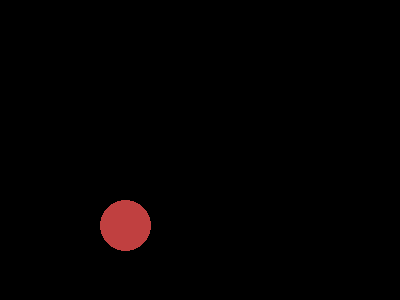

In [6]:
# 放物線を関数で定義しておく
def fy(t):
    return (t - 10)**2 + 100

filelist = []
for t in range (20):
    canvas = Image.new("RGB", (400,300), color="black") 
    draw = ImageDraw.Draw(canvas)
    x = 100 + 10 * t
    y = fy(t)
    draw.ellipse((x, y, x+50, y+50),fill=(192, 64, 64))
    canvas.save(f"ball{t}.png") 
    filelist.append(f"ball{t}.png")
    APNG.from_files(filelist, delay=100).save("ball-anime.png")
IPython.display.Image("ball-anime.png")

## 見本

<div class="alert alert-info">

Let's try

`2 ** (1//2)` が、正しく $\sqrt{2}$ にならない理由を考えてみよう

</div>

まずは、リストを使わなくても解ける問題ですが、リストの練習を兼ねて解いてみましょう。

### 平均点

<div class="admonition tip">

**例題（平均点）**

期末試験は5人受験した。
点数が40点未満の生徒は全員，補習を受け，成績が40点になった。
5人の平均点を求めよ。

入力例：
```
10
65
100
30
95
```

出力例：
```
68
```

[AtCoder (JOI2014 予選)](https://atcoder.jp/contests/joi2014yo/tasks/joi2014yo_a)

</div>

__(解法) リストを使う場合__

1. 期末試験を記録する空の得点リスト `scores` を用意する
2. 5人分繰り返し、点数を読んで、`scores` に追加する 
3. 平均点は `sum(scores) // 5`



|Python|説明|
|--------|-------------|
|`max(a)`|数列`a`の最大値|
|`min(a)`|数列`a`の最小値|
|`sum(a)`|数列`a`の合計値| 
